# Part B: Applied Questions

Solve the following questions by implementing solutions in code.

## B1
Consider the following Perceptron code.

In [1]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [2]:
import pandas as pd

data_src = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

df = pd.read_csv(data_src, header=None)

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


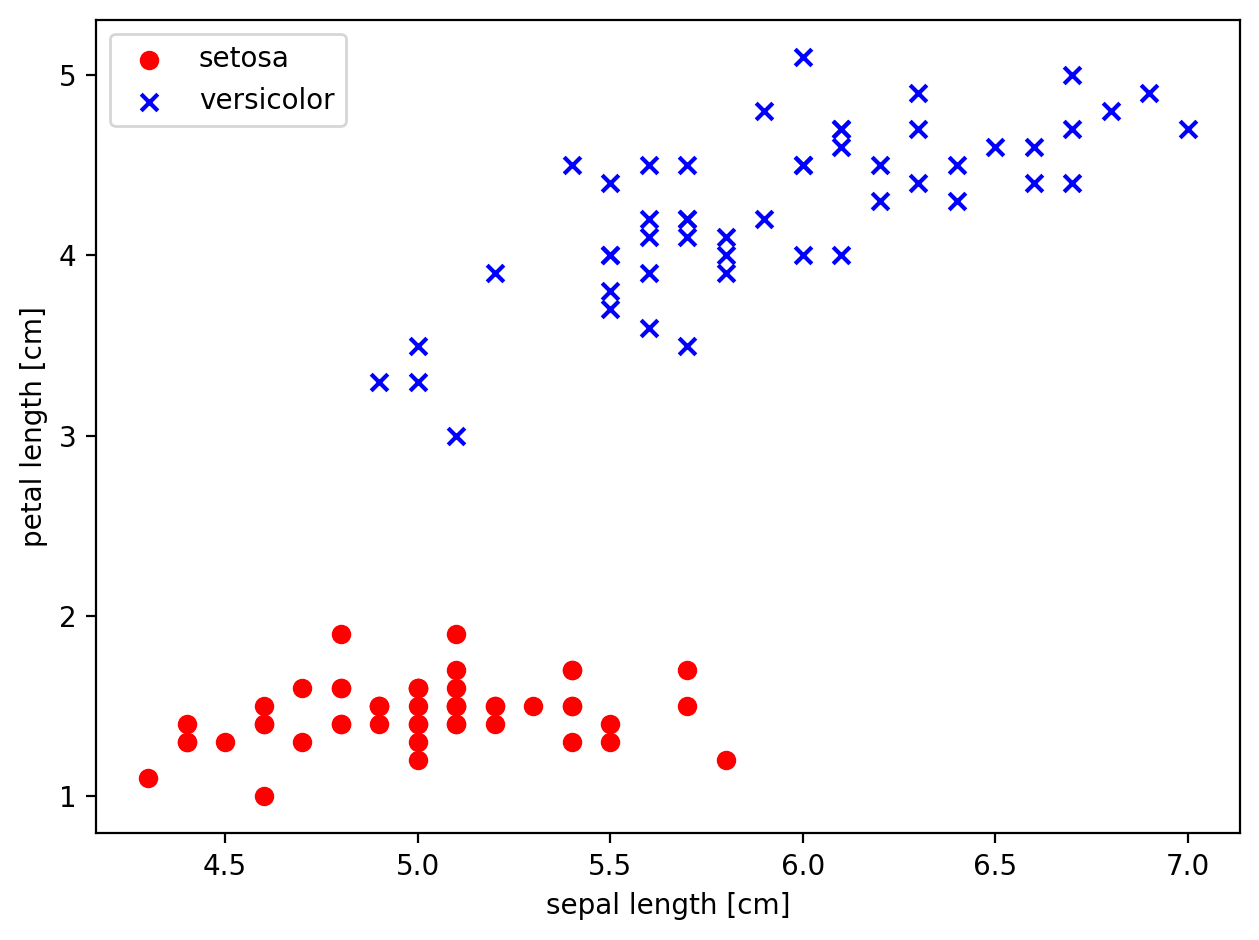

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [4]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn = ppn.fit(X, y)

In [5]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.01):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

As shown in function plot_decision_regions, the decision regions can be visualized by dense sampling via meshgrid. However, if the grid resolution is not enough, as artificially set below, the boundary will appear inaccurate.

Implement function plot_decision_boundary below to analytically compute and plot the decision boundary.

In [6]:
def plot_decision_boundary(X, y, classifier):    
    
    # replace the two lines below with your code
    x1_interval = [X[:, 0].min() - 1, X[:, 0].max() + 1]
    x2_slope = -classifier.w_[1] / classifier.w_[2] if classifier.w_[2] != 0 else 0
    x2_intercept = -classifier.w_[0] / classifier.w_[2]
    x2_interval = [x2_slope * x + x2_intercept for x in x1_interval]
    
    plt.plot(x1_interval, x2_interval, color='green', linewidth=4, label='boundary')

C:\Users\h1tor\AppData\Local\Temp\ipykernel_25020\2359105906.py:16: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


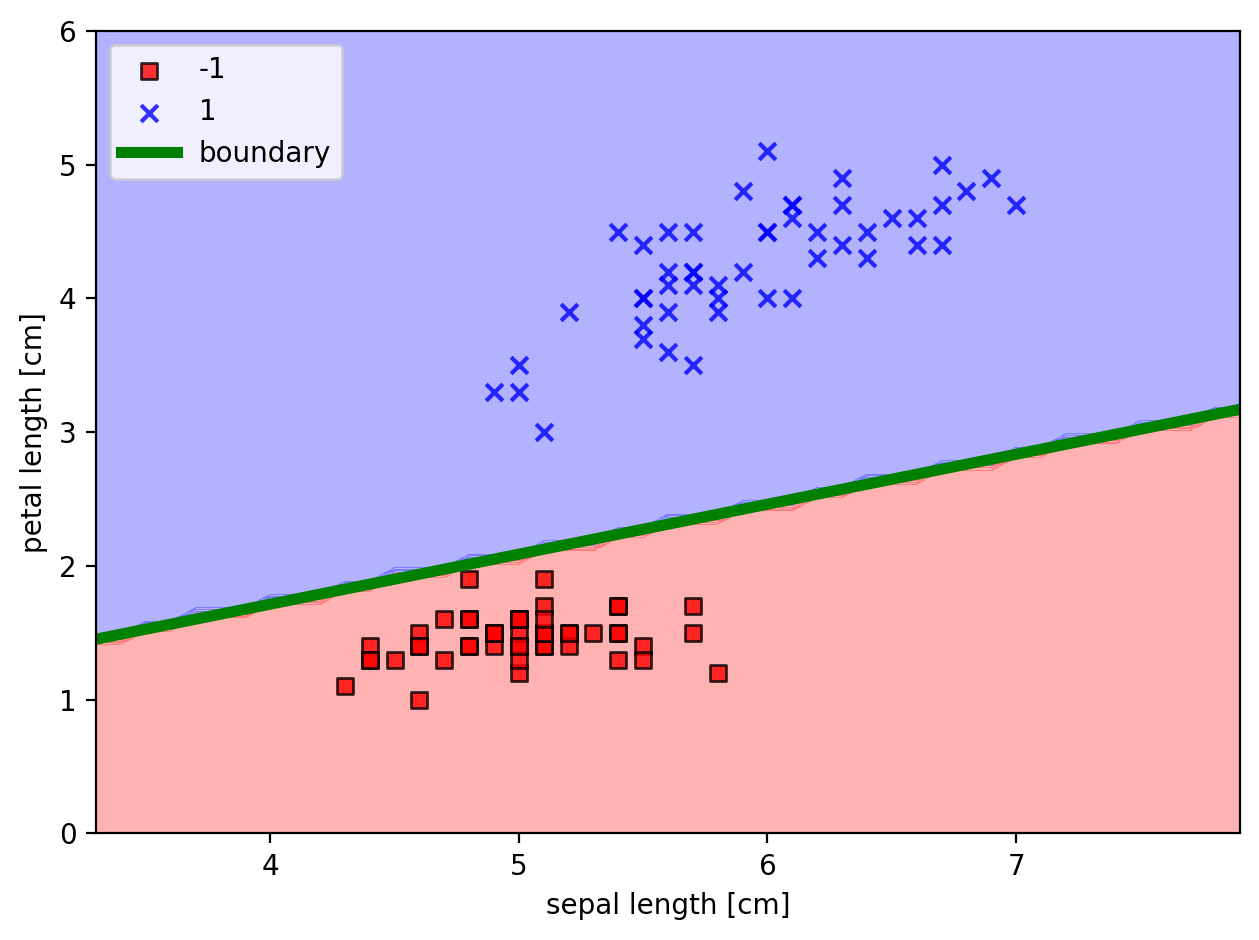

In [7]:
low_res = 0.1 # intentional for this exercise
plot_decision_regions(X, y, classifier=ppn, resolution=low_res)
plot_decision_boundary(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## B2

In class we applied different scikit-learn classifers for the Iris data set.

In this question, we will apply the same set of classifiers over a different data set: hand-written digits.
Please write down the code for different classifiers, choose their hyper-parameters, and compare their performance via the accuracy score as in the Iris dataset.
Which classifier(s) perform(s) the best and worst, and why?

The classifiers include:
* perceptron
* logistic regression
* SVM
* decision tree
* random forest
* KNN

The dataset is available as part of scikit learn, as follows.

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data # training data
y = digits.target # training label

print(X.shape)
print(y.shape)
print(np.unique(y))

(1797, 64)
(1797,)
[0 1 2 3 4 5 6 7 8 9]


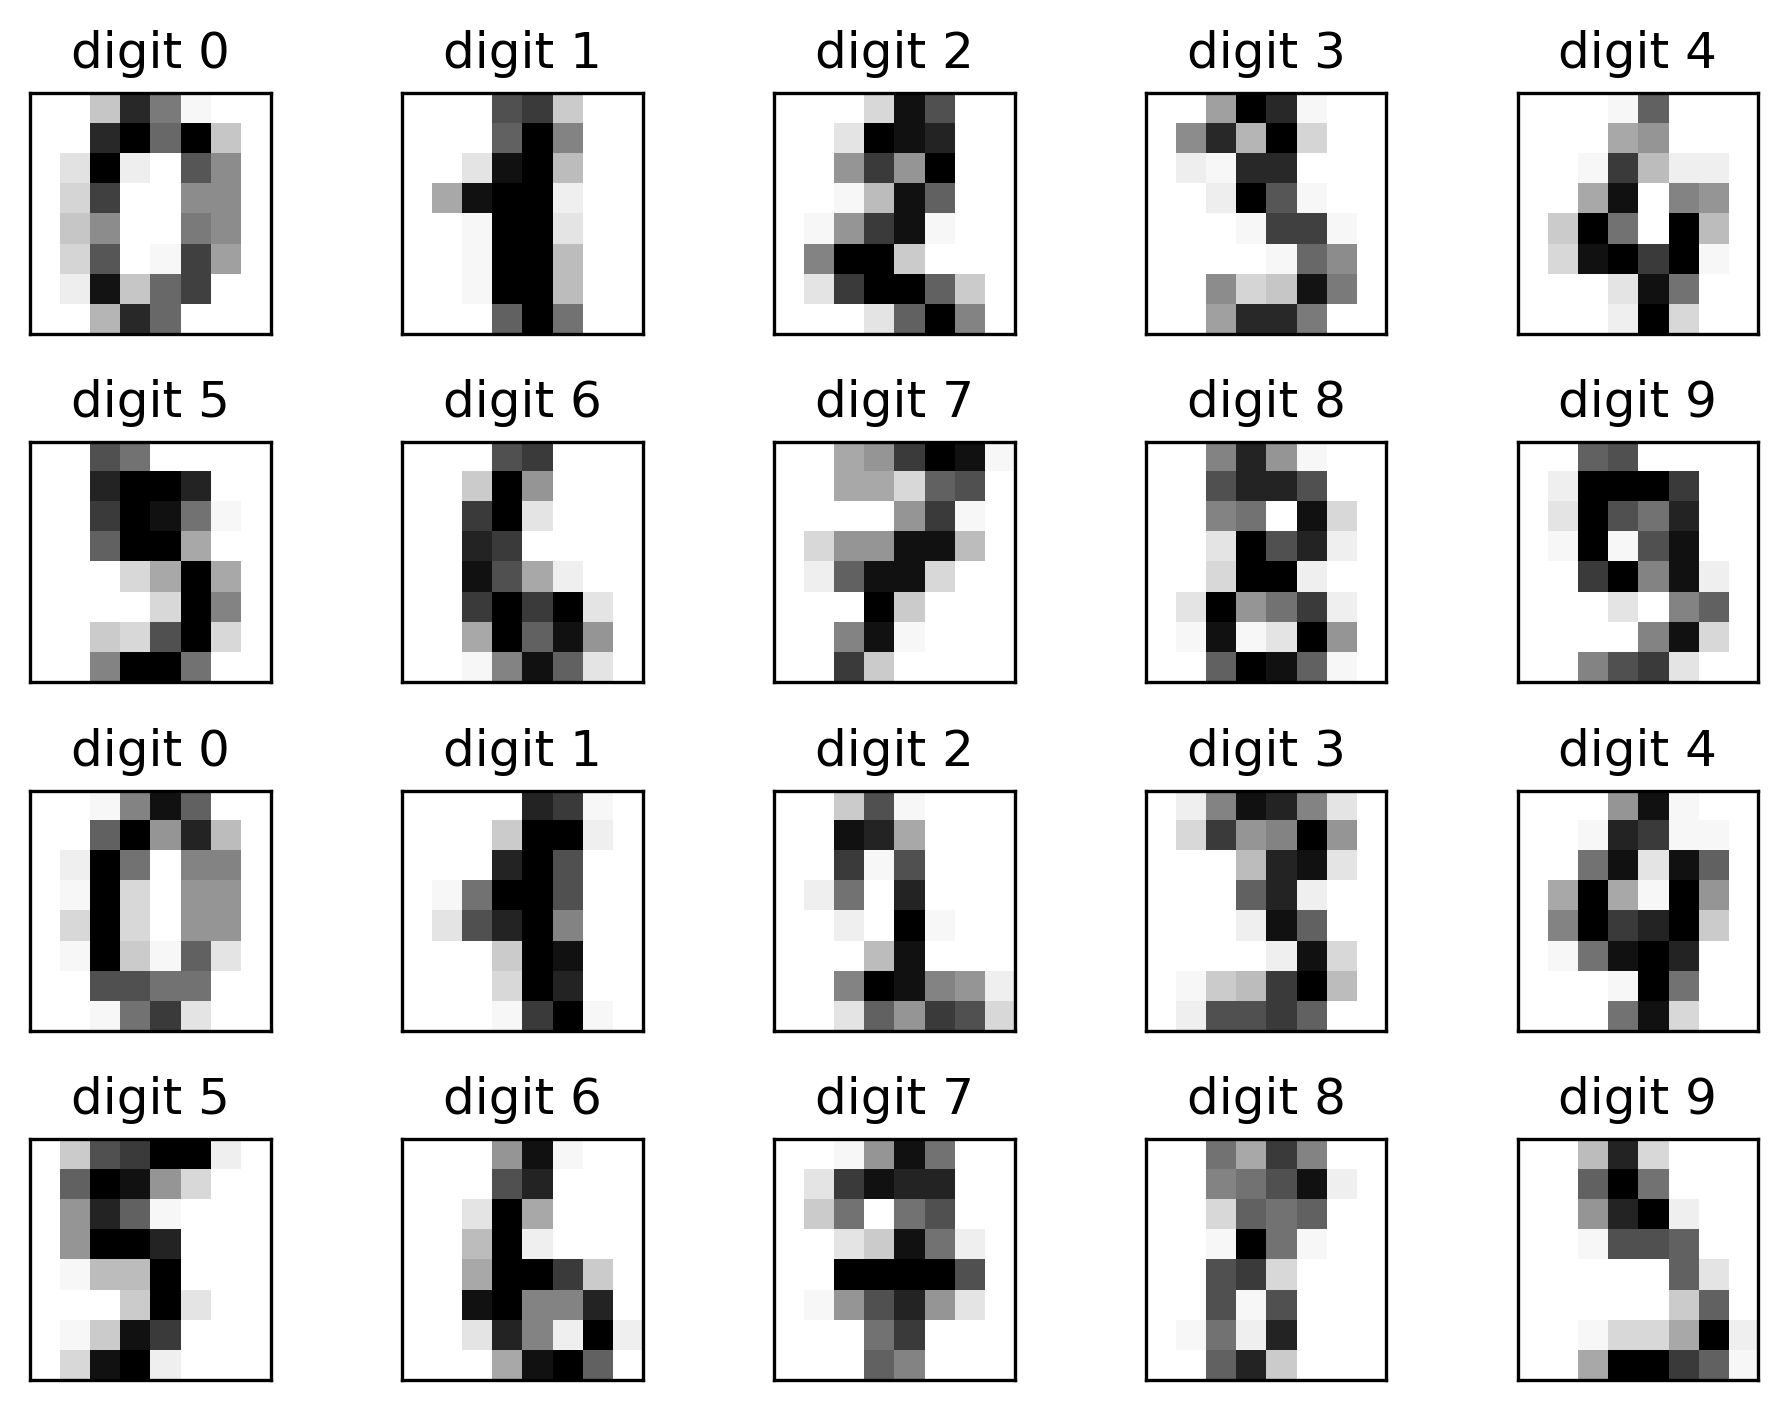

In [9]:
import matplotlib.pyplot as plt
import pylab as pl
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
num_rows = 4
num_cols = 5
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, sharex=True, sharey=True)
ax = ax.flatten()
for index in range(num_rows*num_cols):
    img = digits.images[index]
    label = digits.target[index]
    ax[index].imshow(img, cmap='Greys', interpolation='nearest')
    ax[index].set_title('digit ' + str(label))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

### Date Preprocessing

Hint: Divide training and test data set and apply other techinques we have learned if needed.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

print(x_train_std.shape)
print(x_test_std.shape)

(1437, 64)
(360, 64)


### Classifier #1 Perceptron

In [11]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

ppn = Perceptron(eta0 = 0.1, random_state = 1, verbose = 0)
ppn.fit(x_train_std, y_train)
y_pred = ppn.predict(x_train_std)

# print(y_pred)
# print(y_train)
# print('Misclassified training samples:',(y_train != y_pred).sum())

y_test_pred = ppn.predict(x_test_std)
print('Misclassified samples:', (y_test_pred != y_test).sum())
print("Accuracy: %.3f" % accuracy_score(y_test, y_test_pred))

Misclassified samples: 20
Accuracy: 0.944


### Classifier #2 Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 50, solver = 'saga', max_iter = 5000, random_state = 1)
lr.fit(x_train_std, y_train)
lr_y_pred_train = lr.predict(x_train_std)

# print(lr_y_pred_train)
# print(y_train)
# print('Misclassified training samples:',(y_train != lr_y_pred_train).sum())

lr_y_pred_test = lr.predict(x_test_std)
print('Misclassified samples:', (lr_y_pred_test != y_test).sum())
print("Accuracy: %.3f" % accuracy_score(y_test, lr_y_pred_test))

Misclassified samples: 15
Accuracy: 0.958


### Classifier #3 SVM

In [13]:
from sklearn.svm import SVC

svc = SVC(kernel = "rbf", C = 1, random_state = 1)
svc.fit(x_train_std, y_train)
svc_y_pred_train = svc.predict(x_train_std)

print(svc_y_pred_train)
print(y_train)
print("Misclassified training samples: ", (y_train != lr_y_pred_train).sum())

svc_y_pred_test = svc.predict(x_test_std)
print("Misclassified samples: ", (svc_y_pred_test != y_test).sum())
print("Accuracy: %.3f" % accuracy_score(y_test, svc_y_pred_test))

[3 1 3 ... 8 5 3]
[3 1 3 ... 8 5 3]
Misclassified training samples:  0
Misclassified samples:  3
Accuracy: 0.992


### Classifier #4 Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 1, criterion = "log_loss", max_depth = 15)
dt.fit(x_train_std, y_train)
dt_y_pred_train = dt.predict(x_train_std)
print(dt_y_pred_train)
print(y_train)
print("Misclassified training samples: ", (y_train != dt_y_pred_train).sum())

dt_y_pred_test = dt.predict(x_test_std)
print("Misclassified samples: ", (dt_y_pred_test != y_test).sum())
print("Accuracy: %.3f" % accuracy_score(y_test, dt_y_pred_test))

[3 1 3 ... 8 5 3]
[3 1 3 ... 8 5 3]
Misclassified training samples:  0
Misclassified samples:  45
Accuracy: 0.875


### Classifer #5 Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 1, criterion = "log_loss", max_depth = 30)
rf.fit(x_train_std, y_train)
rf_y_pred_train = rf.predict(x_train_std)
print(rf_y_pred_train)
print(y_train)
print("Misclassified training samples: ", (y_train != rf_y_pred_train).sum())

rf_y_pred_test = rf.predict(x_test_std)
print("Misclassified samples: ", (rf_y_pred_test != y_test).sum())
print("Accuracy: %.3f" % accuracy_score(y_test, rf_y_pred_test))

[3 1 3 ... 8 5 3]
[3 1 3 ... 8 5 3]
Misclassified training samples:  0
Misclassified samples:  12
Accuracy: 0.967


### Classifier #6 KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(x_train_std, y_train)
knn_y_pred_train = knn.predict(x_train_std)
print(knn_y_pred_train)
print(y_train)
print("Misclassified training samples: ", (y_train != knn_y_pred_train).sum())

knn_y_pred_test = knn.predict(x_test_std)
print("Misclassified samples: ", (knn_y_pred_test != y_test).sum())
print("Accuracy: %.3f" % accuracy_score(y_test, knn_y_pred_test))

[3 1 3 ... 8 5 3]
[3 1 3 ... 8 5 3]
Misclassified training samples:  20
Misclassified samples:  5
Accuracy: 0.986


c:\Users\h1tor\anaconda3\envs\comp7404_a4\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\h1tor\anaconda3\envs\comp7404_a4\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\h1tor\anaconda3\envs\comp7404_a4\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\h1tor\anaconda3\envs\comp7404_a4\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\h1tor\anaconda3\envs\comp7404_a4\lib\subprocess.py", line 1436, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executabl

## B3
Build a spam classifier:

*   Download examples of spam and ham from Apache SpamAssassin’s public datasets.
*   Unzip the datasets and familiarize yourself with the data format.
*   Split the datasets into a training set and a test set.
*   Write a data preparation pipeline to convert each email into a feature vector. Your preparation pipeline should transform an email into a (sparse) vector that indicates the presence or absence of each possible word. For example, if all emails only ever contain four words, “Hello,” “how,” “are,” “you,” then the email “Hello you Hello Hello you” would be converted into a vector [1, 0, 0, 1] (meaning [“Hello” is present, “how” is absent, “are” is absent, “you” is present]), or [3, 0, 0, 2] if you prefer to count the number of occurrences of each word.
*   You may want to add hyperparameters to your preparation pipeline to control whether or not to strip off email headers, convert each email to lowercase, remove punctuation, replace all URLs with “URL,” replace all numbers with “NUMBER,” or even perform stemming (i.e., trim off word endings; there are Python libraries available to do this).
*   Finally, try out several classifiers and see if you can build a great spam classifier, with both high recall and high precision.

In [17]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_URL = "https://spamassassin.apache.org/old/publiccorpus/"
HAM_URL = DOWNLOAD_URL + "20030228_easy_ham.tar.bz2"
SPAM_URL = DOWNLOAD_URL + "20030228_spam.tar.bz2"
DATA_PATH = os.path.join("datasets", "tar")

def fetch_spam_data(data_dir = DATA_PATH):
    """
    Get the dataset from the server.
    
    :param data_dir: the local path of downloaded dataset 
    """
    
    # Check if the path exists. If not, create the path.
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
        
    # Download and extract the file.
    for filename, url in (("ham.tar.bz2", HAM_URL), ("spam.tar.bz2", SPAM_URL)):
        path = os.path.join(data_dir, filename)
        if not os.path.exists(path):
            urllib.request.urlretrieve(url, path)
        tar_bz2_file = tarfile.open(path)
        tar_bz2_file.extractall(data_dir)
        tar_bz2_file.close()
        
fetch_spam_data()

In [18]:
HAM_DIR = os.path.join(DATA_PATH, "easy_ham")
SPAM_DIR = os.path.join(DATA_PATH, "spam")
ham_filenames = [name for name in sorted(os.listdir(HAM_DIR)) if len(name) > 20]
spam_filenames = [name for name in sorted(os.listdir(SPAM_DIR)) if len(name) > 20]

In [19]:
import email
import email.policy

def load_email(is_spam, filename, file_path = DATA_PATH):
    """
    Load the content of an email.
    
    :param is_spam: whether the email is a spam email
    :param filename: name of the file
    :param file_path: data's path
    :return: the content of the email
    """
    directory = "spam" if is_spam else "easy_ham"
    
    with open(os.path.join(file_path, directory, filename), "rb") as f:
        return email.parser.BytesParser(policy = email.policy.default).parse(f)
    
ham_emails = [load_email(False, filename = name) for name in ham_filenames]
spam_emails = [load_email(True, filename = name) for name in spam_filenames]

In [20]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split the train and test set
x = np.array(ham_emails + spam_emails, dtype = object)
y = np.array([0] * len(ham_emails) + [1] * len(spam_emails))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [21]:
import re
from html import unescape

def html_to_plain_text(html):
    """
    Transform the HTML content to plain text.
    
    :param html: HTML content
    :return: plain text corresponding to the HTML content
    """
    text = re.sub(r'<head.*?>.*?</head>','',html,flags = re.M | re.S | re.I)
    text = re.sub(r'<a\s.*?>','HYPERLINK',text,flags = re.M | re.S | re.I)
    text = re.sub(r'<.*?>','',text,flags = re.M | re.S)
    text = re.sub(r'(\s*\n)+','\n',text,flags = re.M | re.S)
    
    return unescape(text)

def email_to_text(email):
    """
    Transform an email to plain text.
    
    :param email: the email content
    :return: plain text corresponding to the email content
    """
    for part in email.walk():
        ctype = part.get_content_type()
        # We only need content whose type is "text/plain" or "text/html"
        if not ctype in ("text/plain","text/html"):
            continue
            
        try:
            content = part.get_content()
        except:
            content = str(part.get_payload())
        
        if ctype == "text/plain":
            return content
        if ctype == "text/html":
            return html_to_plain_text(content)

In [22]:
import nltk
import urlextract
from sklearn.base import BaseEstimator, TransformerMixin
from collections import Counter

stemmer = nltk.PorterStemmer()
url_extractor = urlextract.URLExtract()

class EmailToWordCount(BaseEstimator, TransformerMixin):
    def __init__(self, strip_headers = True, lower_case = True, remove_punctuation = True,
        replace_urls = True, replace_numbers = True, stemming = True):
        self.strip_headers = strip_headers
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.replace_urls = replace_urls
        self.replace_numbers = replace_numbers
        self.stemming = stemming
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        x_transformed = []
        for email in X:
            text = email_to_text(email) or ""
            if self.lower_case:
                text = text.lower()
            
            if self.replace_urls and url_extractor is not None:
                urls = list(set(url_extractor.find_urls(text)))
                urls.sort(key = lambda url: len(url), reverse = True)
                for url in urls:
                    text = text.replace(url, "URL")
            
            if self.replace_numbers:
                text = re.sub(r"\d+(?:\.\d*(?:[eE]\d+))?", "NUMBER", text)
            
            if self.remove_punctuation:
                text = re.sub(r"\W+", " ", text, flags=re.M)
            
            word_counts = Counter(text.split())
            if self.stemming and stemmer is not None:
                stemmed_word_counts = Counter()
                for word, count in word_counts.items():
                    stemmed_word = stemmer.stem(word)
                    stemmed_word_counts[stemmed_word] += count
                word_counts = stemmed_word_counts
            x_transformed.append(word_counts)
            
        return np.array(x_transformed)

In [23]:
from scipy.sparse import csr_matrix

class WordCounterToVector(BaseEstimator,TransformerMixin):
    def __init__(self, vocabulary_size = 1000):
        self._vocabulary = None
        self._most_common = None
        self.vocabulary_size = vocabulary_size
        
    def fit(self, X, y = None):
        total_count = Counter()
        
        for word_count in X:
            for word, count in word_count.items():
                total_count[word] += min(count, 10)
        
        most_common = total_count.most_common()[:self.vocabulary_size]
        self._most_common = most_common
        self._vocabulary = {word: index + 1 for index, (word, count) in enumerate(most_common)}
        
        return self
    
    def transform(self, X, y = None):
        rows = []
        cols = []
        data = []
        for row, word_count in enumerate(X):
            for word, count in word_count.items():
                rows.append(row)
                cols.append(self._vocabulary.get(word, 0))
                data.append(count)
                
        return csr_matrix((data, (rows, cols)), shape = (len(X), self.vocabulary_size + 1))

In [24]:
from sklearn.pipeline import Pipeline

preprocess_pipeline = Pipeline([
    ("email_to_wordcount",EmailToWordCount()),
    ("wordcount_to_vector",WordCounterToVector()),
])

X_train_transformed = preprocess_pipeline.fit_transform(x_train)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_clf = LogisticRegression(random_state = 42, max_iter = 5000)
score = cross_val_score(log_clf, X_train_transformed, y_train, cv = 3, verbose = 3)
score.mean()

[CV] END ................................ score: (test=0.978) total time=   0.0s
[CV] END ................................ score: (test=0.990) total time=   0.0s
[CV] END ................................ score: (test=0.988) total time=   0.0s


0.985

In [26]:
from sklearn.metrics import precision_score, recall_score

X_test_transformed = preprocess_pipeline.transform(x_test)
log_clf = LogisticRegression(random_state = 42, max_iter = 5000)
log_clf.fit(X_train_transformed, y_train)
 
y_pred = log_clf.predict(X_test_transformed)
 
print("Precision: {:.2f}%".format(100 * precision_score(y_test,y_pred)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test,y_pred)))

Precision: 99.03%
Recall: 97.14%
